# 事後分布
$y \sim dbinom(n,\theta)$として、
$$
\begin{align}
p(\theta|y) &= \frac{1}{p(y)}\binom{n}{y}\theta^y(1-\theta)^{n-y}\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1} \\
&= C\theta^{a+y-1}(1-\theta)^{b+n-y-1}
\end{align}
$$
$C$は$\theta$と関係がない定数として、
$$
\begin{align}
1&=C\int_{0}^{1}\theta^{a+y-1}(1-\theta)^{b+n-y-1}d\theta \\
\frac{1}{C}&=B(a+y-1,b+n-y) \\
&=\frac{\Gamma(a+y)\Gamma(b+n-y)}{\Gamma(a+b+n)} \\
C&=\frac{\Gamma(a+b+n)}{\Gamma(a+y)\Gamma(b+n-y)}
\end{align}
$$
先の式に$C$を代入して、  
$$
\begin{align}
p(\theta|y) &=\frac{\Gamma(a+b+n)}{\Gamma(a+y)\Gamma(b+n-y)}\theta^{a+y-1}(1-\theta)^{b+n-y-1} \\
&= dbeta(a+y,b+n-y)
\end{align}
$$

[1] "事前分布の平均=0.500000,分散=0.083333,最瀕値=NaN"

[1] "二項分布乱数の値=5"

[1] "事後分布の平均=0.500000,分散=0.019231,最瀕値=0.500000"

[1] "事後分布の95%信頼区間=0.233794 ~ 0.766206"

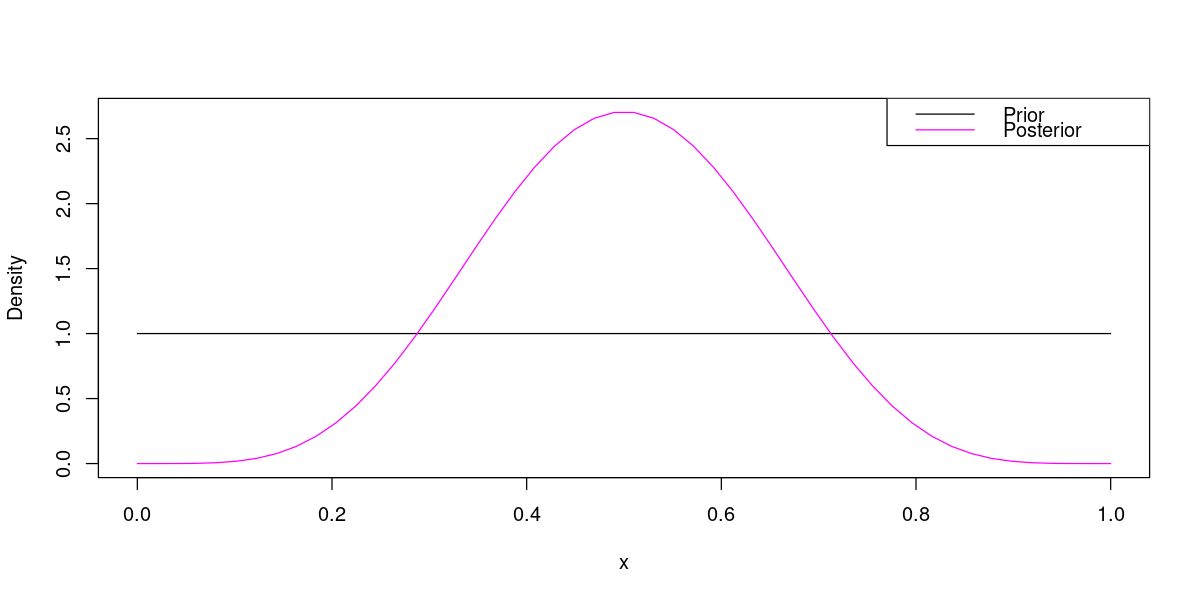

In [1]:
# 事前分布のパラメータ
prior.a <- 1
prior.b <- 1
dbeta.mean <- function(a,b) a/(a+b)
dbeta.var  <- function(a,b) a*b/(a+b)^2/(a+b+1)
dbeta.mode <- function(a,b) (a-1)/(a+b-2)
# 二項分布に従う乱数を1つ生成
set.seed(12345)
rbinom.param.size <- 10
rbinom.param.p <- 0.4
rbinom.value <- rbinom(1, rbinom.param.size, rbinom.param.p)
# 事後分布
posterior.a <- prior.a + rbinom.value
posterior.b <- prior.b + rbinom.param.size - rbinom.value
# 事前分布と事後分布のグラフを描画
xs <- seq(0, 1, length.out=50)
prior.ys <- dbeta(xs, prior.a, prior.b)
posterior.ys <- dbeta(xs, posterior.a, posterior.b)
ylim.max <- max(max(prior.ys), max(posterior.ys))
library(repr)
options(repr.plot.width=10, repr.plot.height=5)
plot(xs, prior.ys, type="l", ylim=c(0,ylim.max), col="black", xlab="x", ylab="Density")
lines(xs, posterior.ys, col="magenta")
legend("topright", legend = c("Prior","Posterior"), col = c("black", "magenta"), lty=1)
# 平均、分散、最瀕値
sprintf("事前分布の平均=%f,分散=%f,最瀕値=%f",
        dbeta.mean(prior.a, prior.b),
        dbeta.var(prior.a, prior.b),
        dbeta.mode(prior.a, prior.b))
sprintf("二項分布乱数の値=%d",rbinom.value)
sprintf("事後分布の平均=%f,分散=%f,最瀕値=%f",
        dbeta.mean(posterior.a, posterior.b),
        dbeta.var(posterior.a, posterior.b),
        dbeta.mode(posterior.a, posterior.b))
sprintf("事後分布の95%%信頼区間=%f ~ %f",
        qbeta(0.025,posterior.a, posterior.b),
        qbeta(0.975,posterior.a, posterior.b))

# 事後予測分布
新たに得られる変数$y_{new}$が$dbinom(m,\theta)$に従うとして、
事後予測分布はベータ二項分布となる。
$$
\begin{align}
p(y_{new}|y)&=\int_{0}^{1}p(y_{new},\theta|y)d\theta \\
&=\int_{0}^{1}p(y_{new}|\theta,y)p(\theta|y)d\theta \\
&=\int_{0}^{1}p(y_{new}|\theta)p(\theta|y)d\theta \\
&=\int_{0}^{1}\binom{m}{y_{new}}\theta^{y_{new}}(1-\theta)^{m-y_{new}}\frac{1}{B(a+y,b+n-y)}\theta^{a+y-1}(1-\theta)^{b+n-y-1}d\theta \\
&=\binom{m}{y_{new}}\frac{1}{B(a+y,b+n-y)}\int_{0}^{1}\theta^{a+y+y_{new}-1}(1-\theta)^{b+n-y+m-y_{new}-1}d\theta \\
&=\binom{m}{y_{new}}\frac{B(a+y+y_{new},b+n-y+m-y_{new})}{B(a+y,b+n-y)}
\end{align}
$$

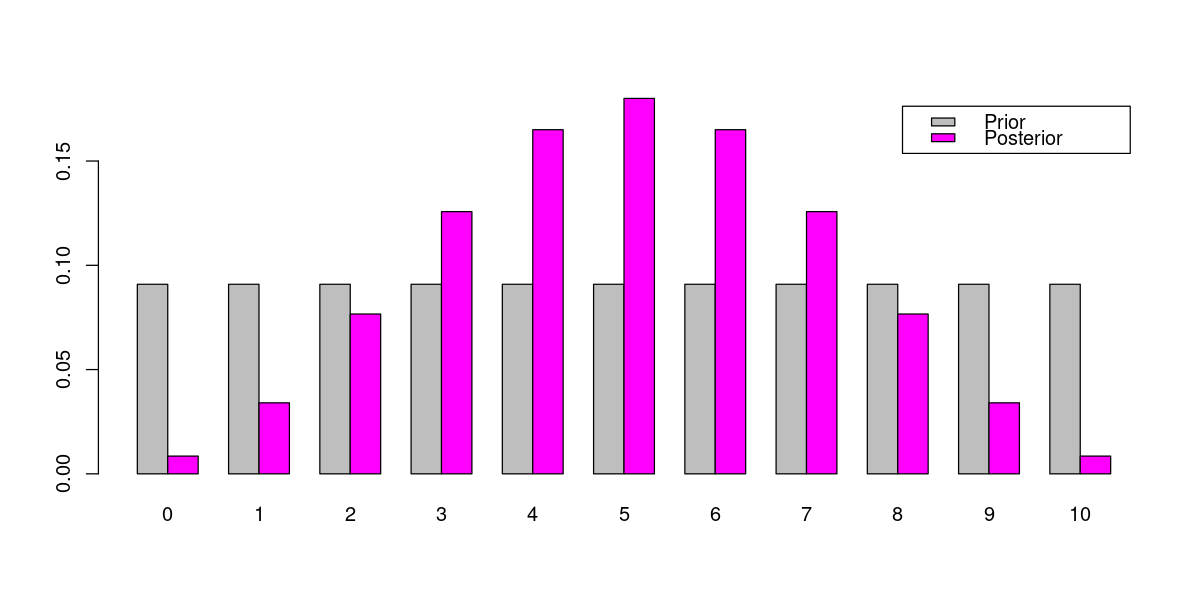

In [2]:
# 予測分布関数
dpred <- function(a,b,m,m.obverse) 
    choose(m,m.obverse) * beta(a+m.obverse,b+m-m.obverse) / beta(a,b)
# 事後分布を得たあと、新たに試行回数Mの施行を行う場合の予測分布。
M <- 10
prior.dpred <- dpred(prior.a, prior.b, M, 0:M)
posterior.dpred <- dpred(posterior.a, posterior.b, M, 0:M)

barplot(height = rbind(prior.dpred, posterior.dpred),
        beside = TRUE,
        names.arg = 0:M,
        col = c("gray","magenta"),
        legend.text = c("Prior","Posterior"))

In [3]:
# ベイジアンアップデート
rbinom.data <- rbinom(20, rbinom.param.size, rbinom.param.p)

my.print <- function(val,a,b) {
    sprintf("得られたデータ=%d, 事後分布の平均=%f,分散=%f,最瀕値=%f",
            val, dbeta.mean(a,b), dbeta.var(a,b), dbeta.mode(a,b))
}

a <- prior.a
b <- prior.b
for(val in rbinom.data) {
    a <- a + val
    b <- b + rbinom.param.size - val
    msg <- my.print(val, a, b)
    print(msg)
}

[1] "得られたデータ=6, 事後分布の平均=0.583333,分散=0.018697,最瀕値=0.600000"
[1] "得られたデータ=5, 事後分布の平均=0.545455,分散=0.010780,最瀕値=0.550000"
[1] "得られたデータ=6, 事後分布の平均=0.562500,分散=0.007457,最瀕値=0.566667"
[1] "得られたデータ=4, 事後分布の平均=0.523810,分散=0.005801,最瀕値=0.525000"
[1] "得られたデータ=2, 事後分布の平均=0.461538,分散=0.004689,最瀕値=0.460000"
[1] "得られたデータ=3, 事後分布の平均=0.435484,分散=0.003902,最瀕値=0.433333"
[1] "得られたデータ=4, 事後分布の平均=0.430556,分散=0.003359,最瀕値=0.428571"
[1] "得られたデータ=5, 事後分布の平均=0.439024,分散=0.002967,最瀕値=0.437500"
[1] "得られたデータ=8, 事後分布の平均=0.478261,分散=0.002683,最瀕値=0.477778"
[1] "得られたデータ=1, 事後分布の平均=0.441176,分散=0.002394,最瀕値=0.440000"
[1] "得られたデータ=2, 事後分布の平均=0.419643,分散=0.002155,最瀕値=0.418182"
[1] "得られたデータ=5, 事後分布の平均=0.426230,分散=0.001988,最瀕値=0.425000"
[1] "得られたデータ=0, 事後分布の平均=0.393939,分散=0.001795,最瀕値=0.392308"
[1] "得られたデータ=4, 事後分布の平均=0.394366,分散=0.001670,最瀕値=0.392857"
[1] "得られたデータ=4, 事後分布の平均=0.394737,分散=0.001562,最瀕値=0.393333"
[1] "得られたデータ=4, 事後分布の平均=0.395062,分散=0.001466,最瀕値=0.393750"
[1] "得られたデータ=4, 事後分布の平均=0.395349,分散=0.001382,最瀕値=0.39411